# Evaluación Final Módulo 4
#### Claudio Durán Guajardo

Para realizar el trabajo se recurrió a un dataset de [Kaggle.com](https://www.kaggle.com/) acerca del coronavirus de **OWID** (Our World in Data) que contiene datos desde 2019 a la fecha el cual puede ser revisado en en el siguiente Link:
[COVID-19 (coronavirus) dataset by OWID](https://www.kaggle.com/kalilurrahman/covid19-coronavirus-dataset-by-owid?select=owid-covid-data.csv)

# Instrucciones Primera Parte

#### **“Medidas de tendencia Central”**

Una vez escogido el data set calcule las medida de tendencia central con una columna con datos numéricos. Es decir, tome un Análisis univariado de alguna variable y calcule los estadísticos y de determine que tipo de distribucion tiene ( graficos).

Tome por ejemplo el archivo de “Medidas de tendencia central”, realice las analisis y conclusiones. 



In [1]:
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-dark") #Si no se encuentra utilizando temas oscuros elimine esta línea de código

In [2]:
df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
df.shape

(152004, 67)

Para un mejor manejo del data set se utilizaran solo algunas columnas, ya que algunas contienen muy pocos datos y al tratar de limpiarlo podríamos eliminar gran parte de la información.

Por esta razón se creará un nuevo DataFrame con las columnas que se utilizarán más adelante,

In [4]:
covid = df[['iso_code','continent','location','date','total_cases_per_million',
            'total_deaths_per_million','icu_patients_per_million','population', 
            'population_density','cardiovasc_death_rate','diabetes_prevalence',
            'handwashing_facilities','life_expectancy']]
covid.shape

(152004, 13)

In [5]:
# Comprobamos la cantidad de datos sin registro o NaN en las columnas elegidas
print(len(covid)-covid.count())

iso_code                         0
continent                     9163
location                         0
date                             0
total_cases_per_million       3319
total_deaths_per_million     20484
icu_patients_per_million    133444
population                    1014
population_density           16681
cardiovasc_death_rate        26712
diabetes_prevalence          20291
handwashing_facilities       89257
life_expectancy              10126
dtype: int64


Nos podemos dar cuenta que **"icu_patients_per_million"** casi todos sus datos son NaN, por lo que si limpiamos el DataFrame **covid** perderemos casi todos los datos, algo similar sucede con **"handwashing_facilities"** por lo que eliminaremos esas columnas del DataFrame. 

In [6]:
covid = covid.drop(['icu_patients_per_million','handwashing_facilities'], axis=1)
covid.head()

,iso_code,continent,location,date,total_cases_per_million,total_deaths_per_million,population,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy
0,AFG,Asia,Afghanistan,2020-02-24,0.126,NaN,39835428.0,54.422,597.029,9.59,64.83
1,AFG,Asia,Afghanistan,2020-02-25,0.126,NaN,39835428.0,54.422,597.029,9.59,64.83
2,AFG,Asia,Afghanistan,2020-02-26,0.126,NaN,39835428.0,54.422,597.029,9.59,64.83
3,AFG,Asia,Afghanistan,2020-02-27,0.126,NaN,39835428.0,54.422,597.029,9.59,64.83
4,AFG,Asia,Afghanistan,2020-02-28,0.126,NaN,39835428.0,54.422,597.029,9.59,64.83


In [7]:
# Volvemos a contar los NaN 
# Podemos ver que si bien existen no son en un porcentaje que pudiera afectar el análisis 
print(len(covid)-covid.count())

iso_code                        0
continent                    9163
location                        0
date                            0
total_cases_per_million      3319
total_deaths_per_million    20484
population                   1014
population_density          16681
cardiovasc_death_rate       26712
diabetes_prevalence         20291
life_expectancy             10126
dtype: int64


In [8]:
# Se eliminan los NaN
covid = covid.dropna()
covid.shape

(111088, 11)

In [9]:
covid.dtypes

iso_code                     object
continent                    object
location                     object
date                         object
total_cases_per_million     float64
total_deaths_per_million    float64
population                  float64
population_density          float64
cardiovasc_death_rate       float64
diabetes_prevalence         float64
life_expectancy             float64
dtype: object

In [10]:
# Sería interesante tener a disposición una columna con el año a partir de la fecha 
# ya que podría permitirnos clasificar los resultados

covid['year'] = covid['date'].str.extract(r"(\d{4})") #Extraermos los primeros caracteres de la fecha
covid['year'] = pd.to_numeric(covid['year']) #Convertimos el string en un int
covid.dtypes


iso_code                     object
continent                    object
location                     object
date                         object
total_cases_per_million     float64
total_deaths_per_million    float64
population                  float64
population_density          float64
cardiovasc_death_rate       float64
diabetes_prevalence         float64
life_expectancy             float64
year                          int64
dtype: object

### Casos totales por millon
Analicemos la columna **"total_cases_per_million"**

In [11]:
covid['total_cases_per_million'].mean()

24878.073700507663

In [12]:
median = covid['total_cases_per_million'].median()
median

5159.5945

- El 50% de los datos se encuentran bajo el valor 5159.5945
- Podemos darnos cuenta que la mediana de los datos es un grado de magnitud inferior al promedio de los datos lo que implica que existen valores muy grandes que causan esa diferencia.


- 

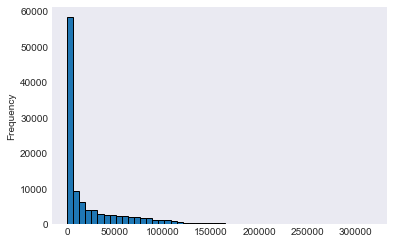

In [13]:
#Revisemos la distribución de los datos a través de un histograma
covid['total_cases_per_million'].plot.hist(bins = 50, edgecolor ='black')
plt.show()

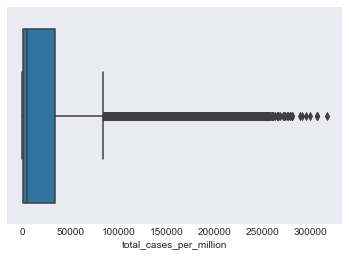

In [14]:
sns.boxplot(x=covid['total_cases_per_million'])
plt.show()

- Podemos decir que esta columna del dataset tiene una distribución fuertemente sesgada
- Existen una gran cantidad de outliers

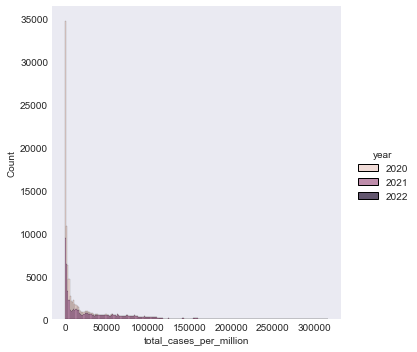

In [15]:
# Analicemos los datos por año
sns.displot(covid, x ='total_cases_per_million', hue = 'year', multiple ='stack')
plt.show()

No se puede distinguen muy bien las diferencias entre los años

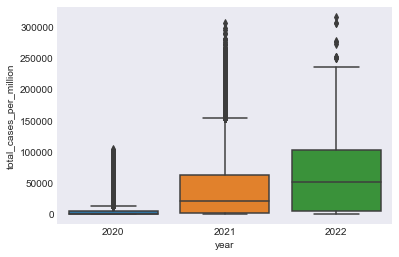

In [16]:
# Revisemos a través de un boxplot el comportamiento
sns.boxplot(data=covid, x='year', y='total_cases_per_million')
plt.show()

Se puede apreciar un aumento progresivo en el total de casos, esto puede deberse solamente a que los casos se van acumulando con el tiempo, por lo que se hace necesario revisarlos de manera particular

In [17]:
# Creamos los DataFrame separados por año y volvemos a hacer el analisis
covid_2020 = covid[(covid['year'] == 2020)]
covid_2021 = covid[(covid['year'] == 2021)]
covid_2022 = covid[(covid['year'] == 2022)]

Revisemos como son las distribuciones por año

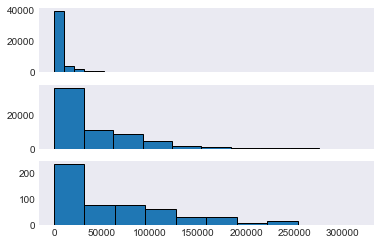

In [18]:
fig, axs = plt.subplots(3, 1, sharex = True)
axs[0].hist(covid_2020['total_cases_per_million'],edgecolor ='black')
axs[1].hist(covid_2021['total_cases_per_million'],edgecolor ='black')
axs[2].hist(covid_2022['total_cases_per_million'],edgecolor ='black')
plt.show()

- Podemos concluir que el total de casos si es acumulativo a través del tiempo
- Se comprueba que a pesar de esto, la distribución sigue siendo la misma.
- Analizar los datos de 2022 para el total de casos nos permite tener una visión global de los años de pandemia en cuanto a casos

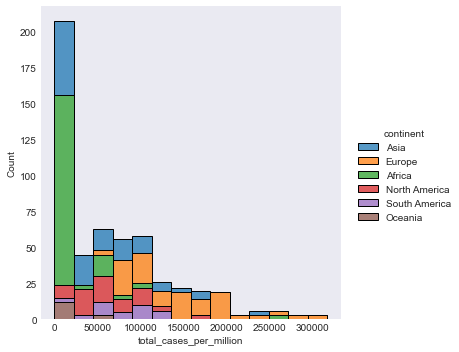

In [19]:
# Revisemos los datos de 2022 por continente
sns.displot(covid_2022, x ='total_cases_per_million', hue = 'continent', multiple ='stack')
plt.show()

- Se presentan datos del total de casos por continente después de mas de 2 años de pandemia
- Podemos apreciar que la cantidad de casos mas grande por millón de habitantes se ha dado en Europa, Africa y Asia, sobre 200000
- Oceanía es el continente con menos casos totales por millón de habitantes.
-Se puede notar además que cada continente se comporta de manera diferente

In [20]:
# Creamos los DataFrame de 2022 separados por continente y volvemos a hacer el analisis
covid_2022_Asia = covid_2022[(covid_2022['continent'] == 'Asia')]
covid_2022_Europe = covid_2022[(covid_2022['continent'] == 'Europe')]
covid_2022_Africa = covid_2022[(covid_2022['continent'] == 'Africa')]
covid_2022_North_America = covid_2022[(covid_2022['continent'] == 'North America')]
covid_2022_South_America = covid_2022[(covid_2022['continent'] == 'South America')]
covid_2022_Oceania = covid_2022[(covid_2022['continent'] == 'Oceania')]

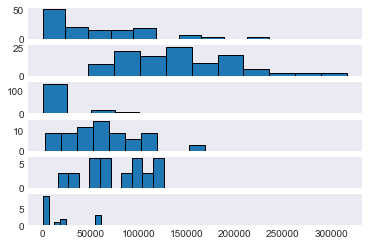

In [21]:
#Creamos los histogramas para cada continente
fig, axs = plt.subplots(6, 1, sharex = True)
axs[0].hist(covid_2022_Asia['total_cases_per_million'],edgecolor ='black')
axs[1].hist(covid_2022_Europe['total_cases_per_million'],edgecolor ='black')
axs[2].hist(covid_2022_Africa['total_cases_per_million'],edgecolor ='black')
axs[3].hist(covid_2022_North_America['total_cases_per_million'],edgecolor ='black')
axs[4].hist(covid_2022_South_America['total_cases_per_million'],edgecolor ='black')
axs[5].hist(covid_2022_Oceania['total_cases_per_million'],edgecolor ='black')
plt.show()

- Efectivamente podemos comprobar que el comportamiento por continentes es diferente, sus distribuciones también lo son


### Muertes totales por millon
Analicemos la columna **"total_deaths_per_million"**

In [22]:
covid['total_deaths_per_million'].mean()

443.2048985219252

In [23]:
covid['total_deaths_per_million'].median()

94.892

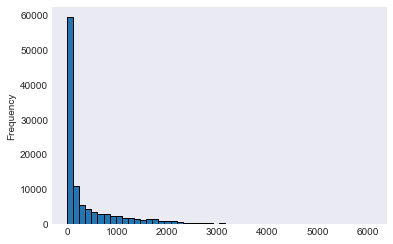

In [24]:
#Revisemos la distribución de los datos a través de un histograma
covid['total_deaths_per_million'].plot.hist(bins = 50, edgecolor ='black')
plt.show()

- Se aprecia que la mayor parte de los datos se concentra en valor pequeños, esto se puede ver con el promedio y la mediana de los datos.
- Existen cantidades de muertos muy elevados por millón de habitantes

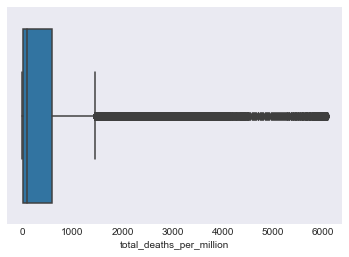

In [25]:
sns.boxplot(x=covid['total_deaths_per_million'])
plt.show()

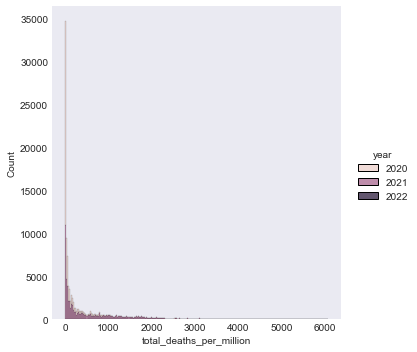

In [26]:
sns.displot(covid, x ='total_deaths_per_million', hue = 'year', multiple ='stack')
plt.show()

- Sigue una tendencia similar al de los casos totales, tiene una distribución fuertemente sesgada
- Revisemos por año

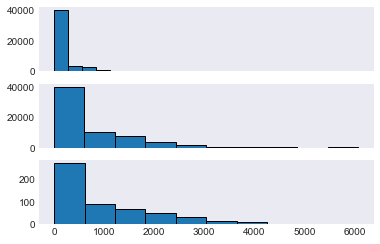

In [27]:
fig, axs = plt.subplots(3, 1, sharex = True)
axs[0].hist(covid_2020['total_deaths_per_million'],edgecolor ='black')
axs[1].hist(covid_2021['total_deaths_per_million'],edgecolor ='black')
axs[2].hist(covid_2022['total_deaths_per_million'],edgecolor ='black')
plt.show()

- Podemos concluir que el total de muertes si es acumulativo a través del tiempo al igual que la cantidad de casos.
- Se comprueba que a pesar de esto, la distribución sigue siendo la misma.
- Analizar los datos de 2022 para el total de muertes por millon nos permite tener una visión global de los años de pandemia en cuanto a muertes

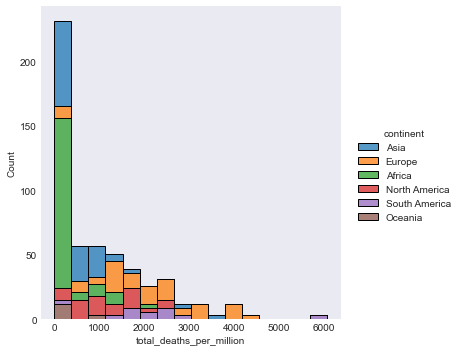

In [28]:
# Revisemos los datos de 2022 por continente
sns.displot(covid_2022, x ='total_deaths_per_million', hue = 'continent', multiple ='stack')
plt.show()

- A diferencia de lo ocurrido con los casos, las muertes por millón de habitantes es Sudamerica la que lidera, si bien tiene menos casos por millon de habitantes estos casos han sido más mortales.
- Europa que lideraba la cantidad de casos tiene gran cantidad de muertos
- Oceanía se ha mantenido con números bajos.

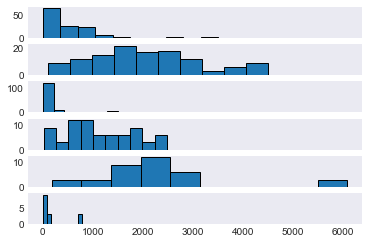

In [29]:
fig, axs = plt.subplots(6, 1, sharex = True)
axs[0].hist(covid_2022_Asia['total_deaths_per_million'],edgecolor ='black')
axs[1].hist(covid_2022_Europe['total_deaths_per_million'],edgecolor ='black')
axs[2].hist(covid_2022_Africa['total_deaths_per_million'],edgecolor ='black')
axs[3].hist(covid_2022_North_America['total_deaths_per_million'],edgecolor ='black')
axs[4].hist(covid_2022_South_America['total_deaths_per_million'],edgecolor ='black')
axs[5].hist(covid_2022_Oceania['total_deaths_per_million'],edgecolor ='black')
plt.show()

- Podemos ver que Asia mantiene la tendencia global de los datos pero los demás continentes tienen sus propias distribuciones.

### Esperanza de Vida
Analicemos la columna **"life_expectancy"**

In [30]:
covid['life_expectancy'].mean()

72.90730105863987

In [31]:
covid['life_expectancy'].median()

74.53

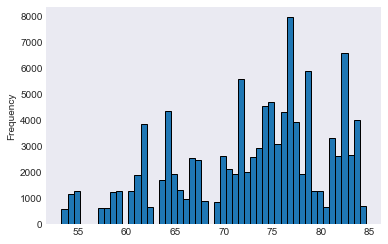

In [32]:
#Revisemos la distribución de los datos a través de un histograma
covid['life_expectancy'].plot.hist(bins = 50, edgecolor ='black')
plt.show()

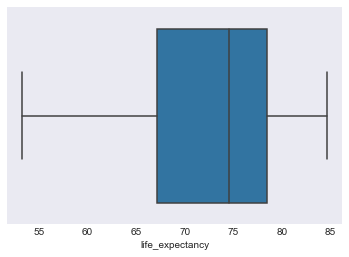

In [33]:
sns.boxplot(x=covid['life_expectancy'])
plt.show()

- No es una distribución como la de las otras variables analizadas con anterioridad
- No presentan outliers

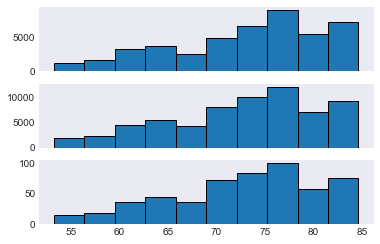

In [34]:
# Revisamos los datos por año para ver que no existe diferencia
fig, axs = plt.subplots(3, 1, sharex = True)
axs[0].hist(covid_2020['life_expectancy'],edgecolor ='black')
axs[1].hist(covid_2021['life_expectancy'],edgecolor ='black')
axs[2].hist(covid_2022['life_expectancy'],edgecolor ='black')
plt.show()

- La variable es independiente del año, salvando las frecuencias, siguen la misma distribución cada año
- Para mantener el coherencia análisis se utilizarán los datos de 2022, ya utilizados en las variables anteriores


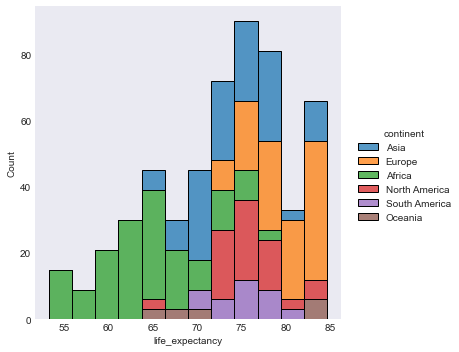

In [35]:
# Revisemos los datos de 2022 por continente
sns.displot(covid_2022, x ='life_expectancy', hue = 'continent', multiple ='stack')
plt.show()

- Se aprecia un comportamiento diferente para cada continente, la esperanza de vida se concentra de manera diferente dependiendo donde estemos mirando
- Se hace necesario observarlos de manera separada

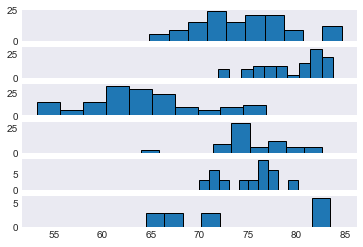

In [36]:
#Se realizan los gráficos de manera separada por continente
fig, axs = plt.subplots(6, 1, sharex = True)
axs[0].hist(covid_2022_Asia['life_expectancy'],edgecolor ='black')
axs[1].hist(covid_2022_Europe['life_expectancy'],edgecolor ='black')
axs[2].hist(covid_2022_Africa['life_expectancy'],edgecolor ='black')
axs[3].hist(covid_2022_North_America['life_expectancy'],edgecolor ='black')
axs[4].hist(covid_2022_South_America['life_expectancy'],edgecolor ='black')
axs[5].hist(covid_2022_Oceania['life_expectancy'],edgecolor ='black')
plt.show()

- Existe una menor esperanza de vida en Africa aunque su distibucion se asemeja más a una normal.
- Europa tiene una esperanza de vida mayor.
- Tanto en Sudamerica como en Oceania se aprecian grupo de comportamiento disimiles en cuanto a esta variable, siendo Oceania la más marcada

### Prevalencia de Diabetes
Analicemos la columna **"diabetes_prevalence"**

In [37]:
covid['diabetes_prevalence'].mean()

7.687834509579622

In [38]:
covid['diabetes_prevalence'].median()

7.11

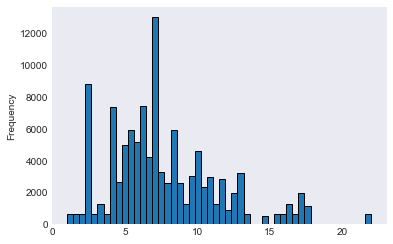

In [39]:
#Revisemos la distribución de los datos a través de un histograma
covid['diabetes_prevalence'].plot.hist(bins = 50, edgecolor ='black')
plt.show()

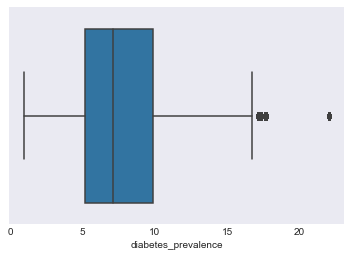

In [40]:
sns.boxplot(x=covid['diabetes_prevalence'])
plt.show()

- No es una distribución fuertemente sesgada como las dos primeras que analizamos
- Presente algunos outliers bien marcados

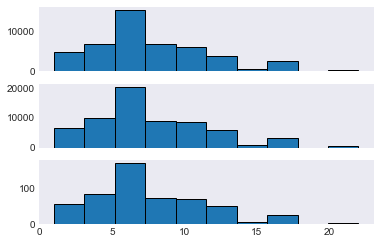

In [41]:
# Revisamos los datos por año para ver que no existe diferencia
fig, axs = plt.subplots(3, 1, sharex = True)
axs[0].hist(covid_2020['diabetes_prevalence'],edgecolor ='black')
axs[1].hist(covid_2021['diabetes_prevalence'],edgecolor ='black')
axs[2].hist(covid_2022['diabetes_prevalence'],edgecolor ='black')
plt.show()

- No presenta diferencias en su comportamiento a través de los años.

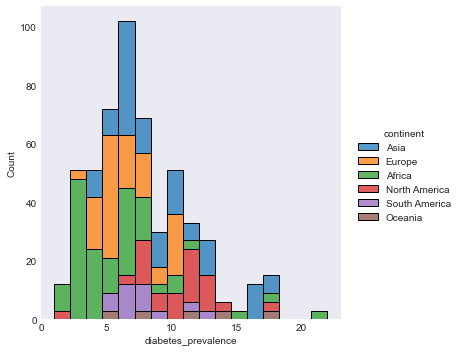

In [42]:
# Revisemos los datos de 2022 por continente
sns.displot(covid_2022, x ='diabetes_prevalence', hue = 'continent', multiple ='stack')
plt.show()

- Se aprecia un comportamiento diferente por continente por lo que podría ser interesante verlo por separado.

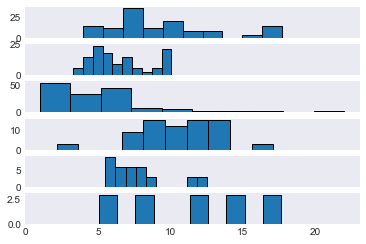

In [43]:
#Se realizan los gráficos de manera separada por continente
fig, axs = plt.subplots(6, 1, sharex = True)
axs[0].hist(covid_2022_Asia['diabetes_prevalence'],edgecolor ='black')
axs[1].hist(covid_2022_Europe['diabetes_prevalence'],edgecolor ='black')
axs[2].hist(covid_2022_Africa['diabetes_prevalence'],edgecolor ='black')
axs[3].hist(covid_2022_North_America['diabetes_prevalence'],edgecolor ='black')
axs[4].hist(covid_2022_South_America['diabetes_prevalence'],edgecolor ='black')
axs[5].hist(covid_2022_Oceania['diabetes_prevalence'],edgecolor ='black')
plt.show()

- La prevalencia de Diabetes en esta más acotada en Europa, en cambio en África el espectro es muy amplio.
- Oceania presenta grupos separados muy marcados, al igual que en Sudamerica pero en menor medida.
- Norteamerica se encuentra acotado pero tiene un grupo aislado a la baja y uno al alza.
- A Excepción de África la prevalencia es menor a 20% aunque al parecer es un caso aislado. Es más, sin contar Asia, la Prevalencia parece ser menor a 15%

# Instrucciones Segunda Parte

#### **“Medidas de Dispersión”**

Continuando con el análisis univariado, calcule las medidas de dispersión. ( std , median, valores min, valores max, rango, cuártiles, rango intercuartil) de la variable que esta analizando en la primera parte.

Realice los gráficos histplot y boxplot, realicé analisis y conclusiones.


### Casos totales por millon
Analicemos la columna **"total_cases_per_million"**

In [44]:

Q1 = covid['total_cases_per_million'].quantile(q = 0.25)
Q3 = covid['total_cases_per_million'].quantile(q = 0.75)
median = covid['total_cases_per_million'].median()
# calculemos el valor maximo y minimo con los quartiles

min_val = covid['total_cases_per_million'].quantile(q = 0)
max_val = covid['total_cases_per_million'].quantile(q = 1.0)

#Calculemos el rango y el rango interquartil
rango = covid['total_cases_per_million'].max() - covid['total_cases_per_million'].min()
iqr = Q3 - Q1
print(min_val, Q1, median, Q3, max_val)
print(rango,iqr)

0.018 846.1565 5159.5945 34260.92425 316751.558
316751.54000000004 33414.76775


In [45]:
# Revisemos los estadisticos con la función describe
covid['total_cases_per_million'].describe()

count    111088.000000
mean      24878.073701
std       38568.193003
min           0.018000
25%         846.156500
50%        5159.594500
75%       34260.924250
max      316751.558000
Name: total_cases_per_million, dtype: float64

- Existe una gran diferencia entre los valores máximos y mínimos, la amplitud de valores también se ve reflejado en una desviación estandar muy grande siendo esta superior al valor promedio.
- Otro punto a destacar es que el valor máximo es 10 veces más grande que el 75% de los datos

In [46]:
# Revisemos esto para 2022
Q1_2022 = covid_2022['total_cases_per_million'].quantile(q = 0.25)
Q3_2022 = covid_2022['total_cases_per_million'].quantile(q = 0.75)
median_2022 = covid_2022['total_cases_per_million'].median()
# calculemos el valor maximo y minimo con los quartiles

min_val_2022 = covid_2022['total_cases_per_million'].quantile(q = 0)
max_val_2022 = covid_2022['total_cases_per_million'].quantile(q = 1.0)

#Calculemos el rango y el rango interquartil
rango_2022 = covid_2022['total_cases_per_million'].max() - covid_2022['total_cases_per_million'].min()
iqr_2022 = Q3_2022 - Q1_2022
print(min_val_2022, Q1_2022, median_2022, Q3_2022, max_val_2022)
print(rango_2022,iqr_2022)

22.26 6012.211 51638.156 103667.894 316751.558
316729.298 97655.683


In [47]:
# Revisemos los estadisticos con la función describe
covid_2022['total_cases_per_million'].describe()

count       537.000000
mean      66089.089644
std       66777.149406
min          22.260000
25%        6012.211000
50%       51638.156000
75%      103667.894000
max      316751.558000
Name: total_cases_per_million, dtype: float64

- Vemos que la dispersión de los datos es aun mayor, pero eso ya lo habiamos intuido a través de los gráficos de la parte anterior, los datos lo corroboran, esto se debe a que el 2022 suma el total de casos de los años anteriores
- Es por esto razón que el rango interquartil se dispará 3 veces su valor, pero el rango se mantiene casi sin alteraciones
- Analicemos estos datos por continente

#### Asia

In [48]:
Q1_2022_Asia = covid_2022_Asia['total_cases_per_million'].quantile(q = 0.25)
Q3_2022_Asia = covid_2022_Asia['total_cases_per_million'].quantile(q = 0.75)

rango_2022_Asia = covid_2022_Asia['total_cases_per_million'].max() - covid_2022_Asia['total_cases_per_million'].min()
iqr_2022_Asia = Q3_2022_Asia - Q1_2022_Asia
print(rango_2022_Asia,iqr_2022_Asia)


235767.34900000002 73918.42525


In [72]:
covid_2022_Asia['total_cases_per_million'].describe()

count       132.000000
mean      54984.175394
std       54788.351388
min          70.976000
25%       13453.902000
50%       29887.052500
75%       87372.327250
max      235838.325000
Name: total_cases_per_million, dtype: float64

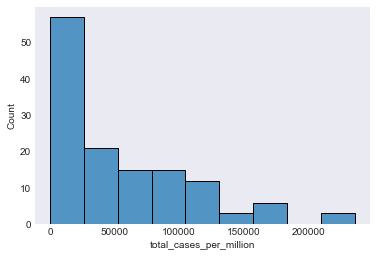

In [52]:
sns.histplot(covid_2022_Asia['total_cases_per_million'],edgecolor='black')
plt.show()

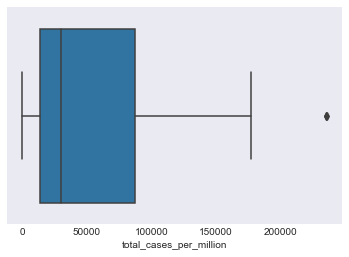

In [53]:
sns.boxplot(x=covid_2022_Asia['total_cases_per_million'])
plt.show()

- Tanto el rango total y el interquartil disminuyen, aunque de todos modos presentan una gran amplitud
- Asia presenta una distribución similar a la del conjunto total.
- Se aprecia un gran tendencia a pocos casos por millón de habitantes pero existen paises que presentan muchos casos, acercandose a los maximos globales, pero siendo és un outliers dentro de este conjunto.

#### Europa

In [55]:

Q1_2022_Europe = covid_2022_Europe['total_cases_per_million'].quantile(q = 0.25)
Q3_2022_Europe = covid_2022_Europe['total_cases_per_million'].quantile(q = 0.75)

rango_2022_Europe = covid_2022_Europe['total_cases_per_million'].max() - covid_2022_Europe['total_cases_per_million'].min()
iqr_2022_Europe = Q3_2022_Europe - Q1_2022_Europe
print(rango_2022_Europe,iqr_2022_Europe)

269838.244 88800.71999999999


In [56]:
covid_2022_Europe['total_cases_per_million'].describe()

count       123.000000
mean     144565.736179
std       59252.028764
min       46913.314000
25%       94669.729500
50%      141087.811000
75%      183470.449500
max      316751.558000
Name: total_cases_per_million, dtype: float64

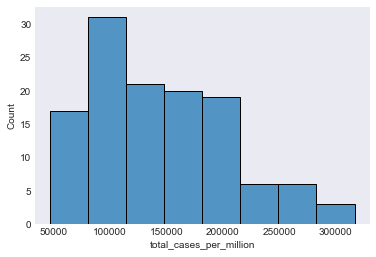

In [57]:
sns.histplot(covid_2022_Europe['total_cases_per_million'],edgecolor='black')
plt.show()

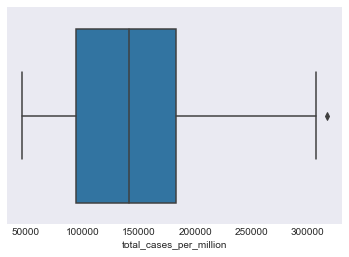

In [59]:
sns.boxplot(x=covid_2022_Europe['total_cases_per_million'])
plt.show()

- Europa presenta una media muy superior al del conjunto global, su desviación estandar es menor al valor del promedio por lo que los datos estan mas concentrados.
- Europa cuenta con el minimo más alto hasta ahora, y los cambios de valor entre quartiles no son de grados de magnitud.
- Europa tiene un comportamiento más homogeneo, podría ser esto debido a su conectividad.

#### Africa

In [60]:
Q1_2022_Africa = covid_2022_Africa['total_cases_per_million'].quantile(q = 0.25)
Q3_2022_Africa = covid_2022_Africa['total_cases_per_million'].quantile(q = 0.75)

rango_2022_Africa = covid_2022_Africa['total_cases_per_million'].max() - covid_2022_Africa['total_cases_per_million'].min()
iqr_2022_Africa = Q3_2022_Africa - Q1_2022_Africa
print(rango_2022_Africa,iqr_2022_Africa)

250315.696 11619.523000000001


In [61]:
covid_2022_Africa['total_cases_per_million'].describe()

count       159.000000
mean      18195.469943
std       38807.356888
min         295.971000
25%        2230.754500
50%        4017.262000
75%       13850.277500
max      250611.667000
Name: total_cases_per_million, dtype: float64

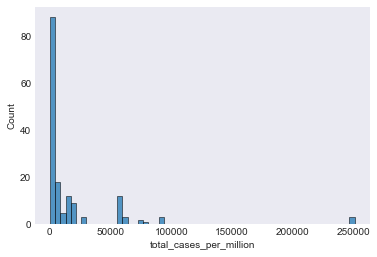

In [62]:
sns.histplot(covid_2022_Africa['total_cases_per_million'],edgecolor='black')
plt.show()

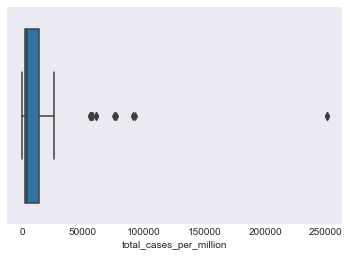

In [63]:
sns.boxplot(x=covid_2022_Africa['total_cases_per_million'])
plt.show()

- Africa presenta el promedio más bajo hasta ahora y al igual que el rango interquartil.
- Existe una tendencia a la baja, sería interesante saber si los medios de detección son comparables al del resto de los contienentes para afirmar que son los que tienen en promedio el menor numero de casos por millon de habillantes y que los maximos son outliars, pero con las columnas del dataset elegido eso no es posible.

#### Norteamerica

In [64]:
Q1_2022_North_America = covid_2022_North_America['total_cases_per_million'].quantile(q = 0.25)
Q3_2022_North_America = covid_2022_North_America['total_cases_per_million'].quantile(q = 0.75)

rango_2022_North_America = covid_2022_North_America['total_cases_per_million'].max() - covid_2022_North_America['total_cases_per_million'].min()
iqr_2022_North_America = Q3_2022_North_America - Q1_2022_North_America
print(rango_2022_North_America,iqr_2022_North_America)

166529.018 50993.95525


In [65]:
covid_2022_North_America['total_cases_per_million'].describe()

count        72.000000
mean      63212.951514
std       38347.420831
min        2251.405000
25%       36890.837750
50%       57075.240500
75%       87884.793000
max      168780.423000
Name: total_cases_per_million, dtype: float64

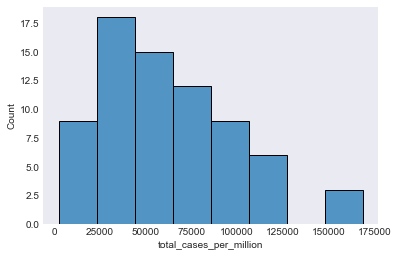

In [66]:
sns.histplot(covid_2022_North_America['total_cases_per_million'],edgecolor='black')
plt.show()

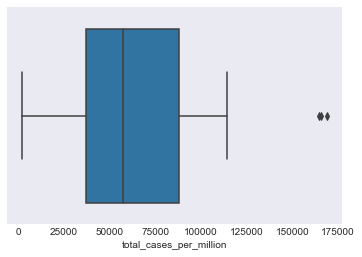

In [67]:
sns.boxplot(x=covid_2022_North_America['total_cases_per_million'])
plt.show()

- Norteamerica presenta el menor rango hasta ahora de los datos teniendo acotado sus numeros de casos por millón de habitantes, su maximo es practicamente la mitad del maximo global, siendo este un outliar de este conjunto.
- Los datos no se encuentran tan dispersos como el conjunto global, siendo la desviación estandar menor al promedio.

#### Sudamerica

In [68]:
Q1_2022_South_America = covid_2022_South_America['total_cases_per_million'].quantile(q = 0.25)
Q3_2022_South_America = covid_2022_South_America['total_cases_per_million'].quantile(q = 0.75)

rango_2022_South_America = covid_2022_South_America['total_cases_per_million'].max() - covid_2022_South_America['total_cases_per_million'].min()
iqr_2022_South_America = Q3_2022_South_America - Q1_2022_South_America
print(rango_2022_South_America,iqr_2022_South_America)

110349.78 51212.81750000001


In [69]:
covid_2022_South_America['total_cases_per_million'].describe()

count        36.000000
mean      76300.832833
std       33808.546834
min       15496.562000
25%       50776.954750
50%       78994.060000
75%      101989.772250
max      125846.342000
Name: total_cases_per_million, dtype: float64

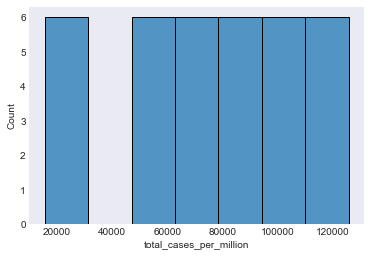

In [70]:
sns.histplot(covid_2022_South_America['total_cases_per_million'],edgecolor='black')
plt.show()

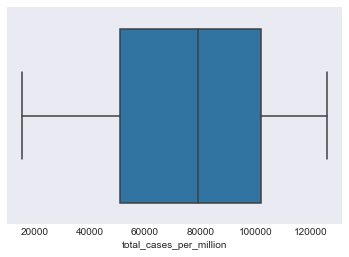

In [71]:
sns.boxplot(x=covid_2022_South_America['total_cases_per_million'])
plt.show()

- Sudamerica presenta un comportamiento homogeneo en cuanto a casos por millón de habitantes.
- Su máximo es menor a la mitad del maximo global
- La diferencia entre máximo y minimo es solo un orden de magnitud

#### Oceania

In [ ]:
covid_2022_Oceania = covid_2022[(covid_2022['continent'] == 'Oceania')]

In [72]:
Q1_2022_Oceania = covid_2022_Oceania['total_cases_per_million'].quantile(q = 0.25)
Q3_2022_Oceania = covid_2022_Oceania['total_cases_per_million'].quantile(q = 0.75)

rango_2022_Oceania = covid_2022_Oceania['total_cases_per_million'].max() - covid_2022_South_America['total_cases_per_million'].min()
iqr_2022_Oceania = Q3_2022_Oceania - Q1_2022_Oceania
print(rango_2022_Oceania,iqr_2022_Oceania)

45428.303 17180.114999999998


In [73]:
covid_2022_Oceania['total_cases_per_million'].describe()

count       15.000000
mean     17273.481667
std      23331.358779
min         22.260000
25%       2787.744500
50%       3968.635000
75%      19967.859500
max      60924.865000
Name: total_cases_per_million, dtype: float64

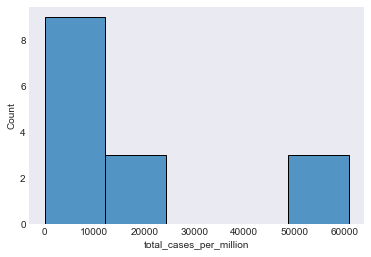

In [49]:
sns.histplot(covid_2022_Oceania['total_cases_per_million'],edgecolor='black')
plt.show()

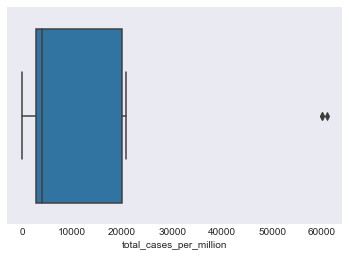

In [74]:
sns.boxplot(x=covid_2022_Oceania['total_cases_per_million'])
plt.show()

- Oceania presenta los niveles más bajos de todo el conjunto global
- Su máximo de casos es 1/5 del máximo global, lo que podría hablar de su buen manejo de la pandemia, aunque este es un opinión que el dataset no puede respaldar.

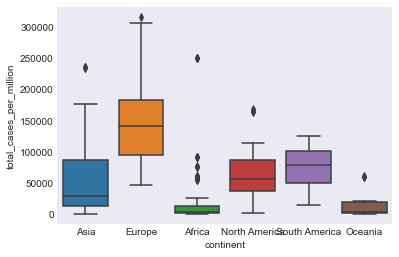

In [75]:
# Revisemos a través de un boxplot el comportamiento
sns.boxplot(data=covid_2022, x='continent', y='total_cases_per_million')
plt.show()

- Mirando los datos en su conjunto, se puede apreciar que Europa es el continente más afectado por la pandemia en cuanto a casos por millón de habitantes se refiere.
- Oceania es el de mejor comportamiento, junto con Africa pero este último presenta varios casos atipicos con números más altos.


### Muertes totales por millon
Analicemos la columna **"total_deaths_per_million"**

In [76]:
Q1 = covid['total_deaths_per_million'].quantile(q = 0.25)
Q3 = covid['total_deaths_per_million'].quantile(q = 0.75)
median = covid['total_deaths_per_million'].median()
# calculemos el valor maximo y minimo con los quartiles

min_val = covid['total_deaths_per_million'].quantile(q = 0)
max_val = covid['total_deaths_per_million'].quantile(q = 1.0)

#Calculemos el rango y el rango interquartil
rango = covid['total_deaths_per_million'].max() - covid['total_deaths_per_million'].min()
iqr = Q3 - Q1
print(min_val, Q1, median, Q3, max_val)
print(rango,iqr)

0.001 13.611 94.892 584.44 6079.783
6079.782 570.8290000000001


In [78]:
covid['total_deaths_per_million'].describe()

count    111088.000000
mean        443.204899
std         721.554891
min           0.001000
25%          13.611000
50%          94.892000
75%         584.440000
max        6079.783000
Name: total_deaths_per_million, dtype: float64

- El rango de datos es practicamente el valor máximo, la diferencia entre el minimo y el maximo es 7 ordendes de magnitud.
- La dispersión de los datos es altisima siendo la desviación estandar cercana al doble del valor promedio

In [77]:
# Revisemos esto para 2022
Q1_2022 = covid_2022['total_deaths_per_million'].quantile(q = 0.25)
Q3_2022 = covid_2022['total_deaths_per_million'].quantile(q = 0.75)
median_2022 = covid_2022['total_deaths_per_million'].median()
# calculemos el valor maximo y minimo con los quartiles

min_val_2022 = covid_2022['total_deaths_per_million'].quantile(q = 0)
max_val_2022 = covid_2022['total_deaths_per_million'].quantile(q = 1.0)

#Calculemos el rango y el rango interquartil
rango_2022 = covid_2022['total_deaths_per_million'].max() - covid_2022['total_deaths_per_million'].min()
iqr_2022 = Q3_2022 - Q1_2022
print(min_val_2022, Q1_2022, median_2022, Q3_2022, max_val_2022)
print(rango_2022,iqr_2022)

3.101 110.671 618.752 1663.154 6079.783
6076.682000000001 1552.483


In [79]:
covid_2022['total_deaths_per_million'].describe()

count     537.000000
mean     1005.687875
std      1105.331751
min         3.101000
25%       110.671000
50%       618.752000
75%      1663.154000
max      6079.783000
Name: total_deaths_per_million, dtype: float64

- La dispersión de los datos sigue siendo alta, pero está más acotada que el conjunto global.
- La diferencia entre el minimo y el máximo sigue siendo de varios ordenes de magnitud pero es es inferior al del conjunto global


#### Asia

In [81]:
Q1_2022_Asia = covid_2022_Asia['total_deaths_per_million'].quantile(q = 0.25)
Q3_2022_Asia = covid_2022_Asia['total_deaths_per_million'].quantile(q = 0.75)

rango_2022_Asia = covid_2022_Asia['total_deaths_per_million'].max() - covid_2022_Asia['total_deaths_per_million'].min()
iqr_2022_Asia = Q3_2022_Asia - Q1_2022_Asia
print(rango_2022_Asia,iqr_2022_Asia)

3500.005 638.3757499999999


In [82]:
covid_2022_Asia['total_deaths_per_million'].describe()

count     132.000000
mean      585.323765
std       674.344482
min         3.210000
25%       164.620500
50%       371.215500
75%       802.996250
max      3503.215000
Name: total_deaths_per_million, dtype: float64

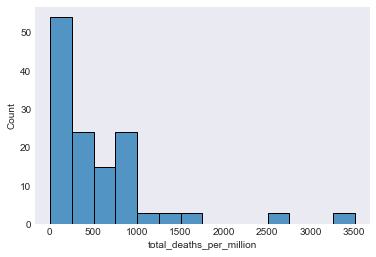

In [83]:
sns.histplot(covid_2022_Asia['total_deaths_per_million'],edgecolor='black')
plt.show()

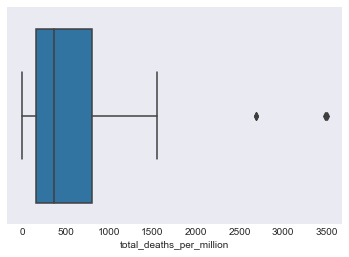

In [84]:
sns.boxplot(x=covid_2022_Asia['total_deaths_per_million'])
plt.show()

- Tanto el rango y el rango interquartil de Asia son la mitad del conjunto global, al igual que su promedio y su dispersión a través de la disviación estandar
- Presenta casos atipicos que aumentan al doble su máximo el que sin ellos estaria rondando las 1500 muertes por millón de habitantes.

#### Europa

In [85]:
Q1_2022_Europe = covid_2022_Europe['total_deaths_per_million'].quantile(q = 0.25)
Q3_2022_Europe = covid_2022_Europe['total_deaths_per_million'].quantile(q = 0.75)

rango_2022_Europe = covid_2022_Europe['total_deaths_per_million'].max() - covid_2022_Europe['total_deaths_per_million'].min()
iqr_2022_Europe = Q3_2022_Europe - Q1_2022_Europe
print(rango_2022_Europe,iqr_2022_Europe)

4398.774 1361.2410000000004


In [86]:
covid_2022_Europe['total_deaths_per_million'].describe()

count     123.000000
mean     2055.859504
std      1107.386952
min       107.759000
25%      1336.810000
50%      1912.602000
75%      2698.051000
max      4506.533000
Name: total_deaths_per_million, dtype: float64

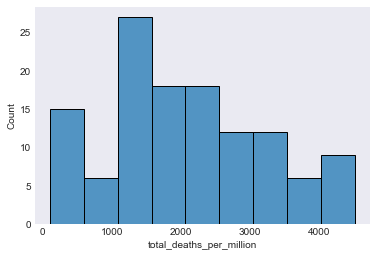

In [88]:
sns.histplot(covid_2022_Europe['total_deaths_per_million'],edgecolor='black')
plt.show()

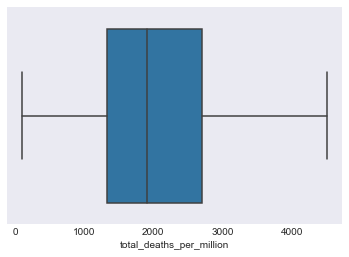

In [87]:
sns.boxplot(x=covid_2022_Europe['total_deaths_per_million'])
plt.show()

- Europa presenta un comportamiento, que podriamos llamar homogeneo en cuanto a esta variable, el total de muertes por millón de habitantes esta acotado por 4500 aproximadamente.

#### Africa

In [89]:
Q1_2022_Africa = covid_2022_Africa['total_deaths_per_million'].quantile(q = 0.25)
Q3_2022_Africa = covid_2022_Africa['total_deaths_per_million'].quantile(q = 0.75)

rango_2022_Africa = covid_2022_Africa['total_deaths_per_million'].max() - covid_2022_Africa['total_deaths_per_million'].min()
iqr_2022_Africa = Q3_2022_Africa - Q1_2022_Africa
print(rango_2022_Africa,iqr_2022_Africa)

2140.708 168.8395


In [90]:
covid_2022_Africa['total_deaths_per_million'].describe()

count     159.000000
mean      272.099296
std       456.757097
min         3.101000
25%        29.251000
50%        81.482000
75%       198.090500
max      2143.809000
Name: total_deaths_per_million, dtype: float64

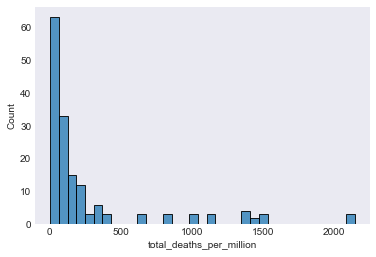

In [92]:
sns.histplot(covid_2022_Africa['total_deaths_per_million'],edgecolor='black')
plt.show()

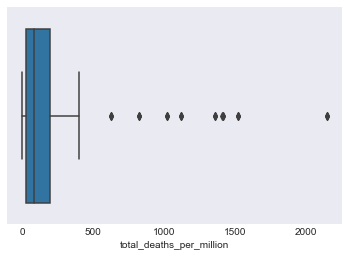

In [91]:
sns.boxplot(x=covid_2022_Africa['total_deaths_per_million'])
plt.show()

- Africa presenta los números más bajos en esta variable, aunque su nivel de dispersión es muy alto.
- Tiene una gran cantidad de outliers

#### Norteamerica

In [101]:
Q1_2022_North_America = covid_2022_North_America['total_deaths_per_million'].quantile(q = 0.25)
Q3_2022_North_America = covid_2022_North_America['total_deaths_per_million'].quantile(q = 0.75)

rango_2022_North_America = covid_2022_North_America['total_deaths_per_million'].max() - covid_2022_North_America['total_deaths_per_million'].min()
iqr_2022_North_America = Q3_2022_North_America - Q1_2022_North_America
print(rango_2022_North_America,iqr_2022_North_America)

2468.779 1007.1512500000001


In [94]:
covid_2022_North_America['total_deaths_per_million'].describe()

count      72.000000
mean     1139.069722
std       695.153160
min        17.585000
25%       708.780000
50%       973.707500
75%      1715.931250
max      2486.364000
Name: total_deaths_per_million, dtype: float64

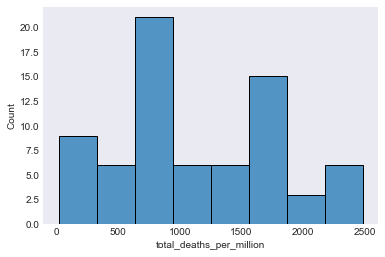

In [95]:
sns.histplot(covid_2022_North_America['total_deaths_per_million'],edgecolor='black')
plt.show()

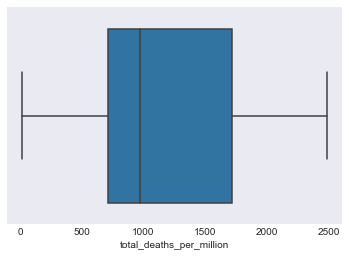

In [96]:
sns.boxplot(x=covid_2022_North_America['total_deaths_per_million'])
plt.show()

- Presenta valores acotados, de un comportamiento bastante homogeneo.
- No presenta outliers

#### Sudamerica

In [100]:
Q1_2022_South_America = covid_2022_South_America['total_deaths_per_million'].quantile(q = 0.25)
Q3_2022_South_America = covid_2022_South_America['total_deaths_per_million'].quantile(q = 0.75)

rango_2022_South_America = covid_2022_South_America['total_deaths_per_million'].max() - covid_2022_South_America['total_deaths_per_million'].min()
iqr_2022_South_America = Q3_2022_South_America - Q1_2022_South_America
print(rango_2022_South_America,iqr_2022_South_America)

5894.066000000001 799.3530000000001


In [98]:
covid_2022_South_America['total_deaths_per_million'].describe()

count      36.000000
mean     2272.753972
std      1346.497106
min       185.717000
25%      1745.748000
50%      2024.025500
75%      2545.101000
max      6079.783000
Name: total_deaths_per_million, dtype: float64

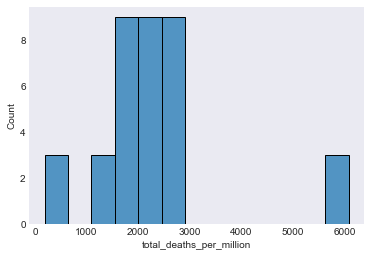

In [103]:
sns.histplot(covid_2022_South_America['total_deaths_per_million'],edgecolor='black')
plt.show()

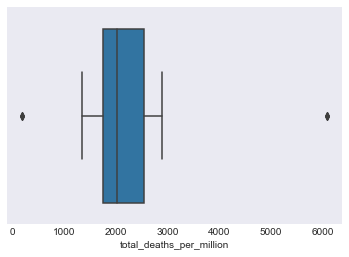

In [102]:
sns.boxplot(x=covid_2022_South_America['total_deaths_per_million'])
plt.show()

- Sudamerica presenta dos outliers muy marcados que hacen que su dispersión se disparé.
- Fuera de ellos tiene un comportamiento bastante homogeneo lo que se puede ver en su rango interquartil

#### Oceania

In [104]:
Q1_2022_Oceania = covid_2022_Oceania['total_deaths_per_million'].quantile(q = 0.25)
Q3_2022_Oceania = covid_2022_Oceania['total_deaths_per_million'].quantile(q = 0.75)

rango_2022_Oceania = covid_2022_Oceania['total_deaths_per_million'].max() - covid_2022_Oceania['total_deaths_per_million'].min()
iqr_2022_Oceania = Q3_2022_Oceania - Q1_2022_Oceania
print(rango_2022_Oceania,iqr_2022_Oceania)

774.316 77.9915


In [107]:
covid_2022_Oceania['total_deaths_per_million'].describe()

count     15.000000
mean     188.332133
std      305.964732
min        3.180000
25%        9.956000
50%       64.700000
75%       87.947500
max      777.496000
Name: total_deaths_per_million, dtype: float64

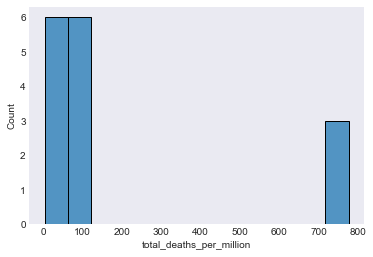

In [106]:
sns.histplot(covid_2022_Oceania['total_deaths_per_million'],edgecolor='black')
plt.show()

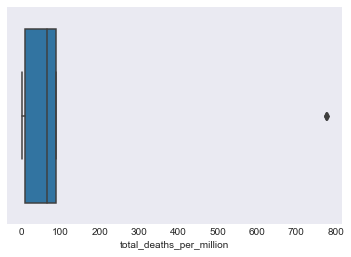

In [105]:
sns.boxplot(x=covid_2022_Oceania['total_deaths_per_million'])
plt.show()

- Oceania siguiendo la tendencia en la variable anterior tiene los números más bajos del conjunto global.
- Presenta un outlier que hace que su dispersión sea más grande, pero de todos modos es menor a cualquier otro continente

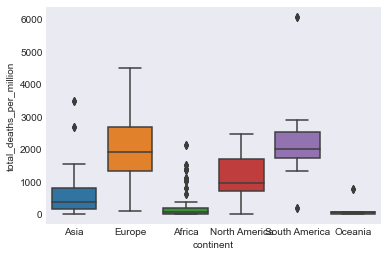

In [50]:
# Revisemos a través de un boxplot el comportamiento
sns.boxplot(data=covid_2022, x='continent', y='total_deaths_per_million')
plt.show()

- Oceania tiene el mejor comportamiento en numero de muertes por millón de habitantes
- Europa sigue siendo el país más afectado, pero esta vez le sigue Sudamerica, lo que nos permite concluir que los casos ahí fueron mas mortales que el resto del continente.

### Esperanza de Vida
Analicemos la columna **"life_expectancy"**

In [51]:
Q1 = covid['life_expectancy'].quantile(q = 0.25)
Q3 = covid['life_expectancy'].quantile(q = 0.75)
median = covid['life_expectancy'].median()
# calculemos el valor maximo y minimo con los quartiles

min_val = covid['life_expectancy'].quantile(q = 0)
max_val = covid['life_expectancy'].quantile(q = 1.0)

#Calculemos el rango y el rango interquartil
rango = covid['life_expectancy'].max() - covid['life_expectancy'].min()
iqr = Q3 - Q1
print(min_val, Q1, median, Q3, max_val)
print(rango,iqr)

53.28 67.11 74.53 78.51 84.63
31.349999999999994 11.400000000000006


In [52]:
covid['life_expectancy'].describe()

count    111088.000000
mean         72.907301
std           7.595920
min          53.280000
25%          67.110000
50%          74.530000
75%          78.510000
max          84.630000
Name: life_expectancy, dtype: float64

In [53]:
# Revisemos esto para 2022
Q1_2022 = covid_2022['life_expectancy'].quantile(q = 0.25)
Q3_2022 = covid_2022['life_expectancy'].quantile(q = 0.75)
median_2022 = covid_2022['life_expectancy'].median()
# calculemos el valor maximo y minimo con los quartiles

min_val_2022 = covid_2022['life_expectancy'].quantile(q = 0)
max_val_2022 = covid_2022['life_expectancy'].quantile(q = 1.0)

#Calculemos el rango y el rango interquartil
rango_2022 = covid_2022['life_expectancy'].max() - covid_2022['life_expectancy'].min()
iqr_2022 = Q3_2022 - Q1_2022
print(min_val_2022, Q1_2022, median_2022, Q3_2022, max_val_2022)
print(rango_2022,iqr_2022)

53.28 67.11 74.25 77.97 84.63
31.349999999999994 10.86


In [54]:
covid_2022['life_expectancy'].describe()

count    537.000000
mean      72.693631
std        7.517033
min       53.280000
25%       67.110000
50%       74.250000
75%       77.970000
max       84.630000
Name: life_expectancy, dtype: float64

- Si bien era algo que intuiamos en la parte anterior ahora podemos comprobar con los datos que esta variable no es diferente en los años respecto al conjunto global

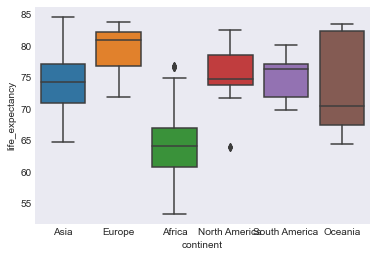

In [56]:
# Revisemos a través de un boxplot el comportamiento
sns.boxplot(data=covid_2022, x='continent', y='life_expectancy')
plt.show()

- Europa y Oceania tiene la mejor expectativa de vida y Africa la peor.
- El rango más amplio lo tiene Africa pero el rango interquartil lo tiene Oceania 

### Prevalencia de Diabetes
Analicemos la columna **"diabetes_prevalence"**

In [57]:
Q1 = covid['diabetes_prevalence'].quantile(q = 0.25)
Q3 = covid['diabetes_prevalence'].quantile(q = 0.75)
median = covid['diabetes_prevalence'].median()
# calculemos el valor maximo y minimo con los quartiles

min_val = covid['diabetes_prevalence'].quantile(q = 0)
max_val = covid['diabetes_prevalence'].quantile(q = 1.0)

#Calculemos el rango y el rango interquartil
rango = covid['diabetes_prevalence'].max() - covid['diabetes_prevalence'].min()
iqr = Q3 - Q1
print(min_val, Q1, median, Q3, max_val)
print(rango,iqr)

0.99 5.18 7.11 9.85 22.02
21.03 4.67


In [59]:
covid['diabetes_prevalence'].describe()

count    111088.000000
mean          7.687835
std           3.837068
min           0.990000
25%           5.180000
50%           7.110000
75%           9.850000
max          22.020000
Name: diabetes_prevalence, dtype: float64

In [60]:
# Revisemos esto para 2022
Q1_2022 = covid_2022['diabetes_prevalence'].quantile(q = 0.25)
Q3_2022 = covid_2022['diabetes_prevalence'].quantile(q = 0.75)
median_2022 = covid_2022['diabetes_prevalence'].median()
# calculemos el valor maximo y minimo con los quartiles

min_val_2022 = covid_2022['diabetes_prevalence'].quantile(q = 0)
max_val_2022 = covid_2022['diabetes_prevalence'].quantile(q = 1.0)

#Calculemos el rango y el rango interquartil
rango_2022 = covid_2022['diabetes_prevalence'].max() - covid_2022['diabetes_prevalence'].min()
iqr_2022 = Q3_2022 - Q1_2022
print(min_val_2022, Q1_2022, median_2022, Q3_2022, max_val_2022)
print(rango_2022,iqr_2022)

0.99 4.97 7.11 10.08 22.02
21.03 5.11


In [61]:
covid_2022['diabetes_prevalence'].describe()

count    537.000000
mean       7.681341
std        3.855985
min        0.990000
25%        4.970000
50%        7.110000
75%       10.080000
max       22.020000
Name: diabetes_prevalence, dtype: float64

- Al igual que la expectativa de vida podemos comprobar con los datos que esta variable no es diferente en los años respecto al conjunto global. Conserva

# Instrucciones Tercera Parte

#### **“Normalización y correlación”**

⁃ Relaciones 2 variables y encontré que tipo de correlación existe (en este caso que si implique causalidad).

⁃ Realice una normalización de la variable X , con el Z-score

⁃ Grafique dicha variable como se ve sin escalamiento y con escalamiento (Indentifique que escalimiento conviene mas, de los vistos en clase).


In [113]:
covid_2022_corr = covid_2022[['iso_code','continent','location','date','total_cases_per_million',
            'total_deaths_per_million','diabetes_prevalence','life_expectancy']]


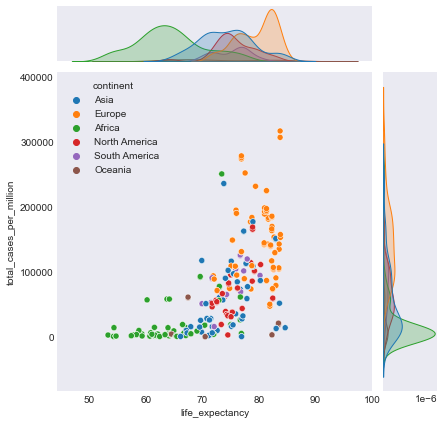

In [114]:
sns.jointplot(data=covid_2022_corr, x='life_expectancy', y='total_cases_per_million', hue='continent')
plt.show()

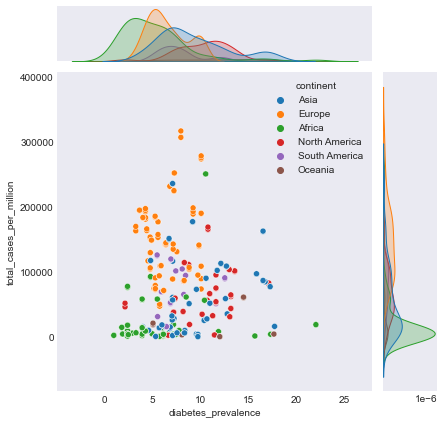

In [115]:
sns.jointplot(data=covid_2022_corr, x='diabetes_prevalence', y='total_cases_per_million', hue='continent')
plt.show()

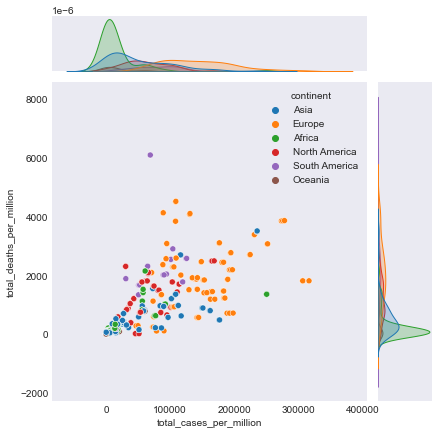

In [116]:
sns.jointplot(data=covid_2022_corr, x='total_cases_per_million', y='total_deaths_per_million', hue='continent')
plt.show()

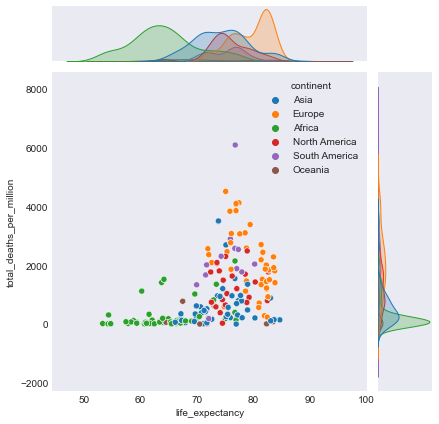

In [117]:
sns.jointplot(data=covid_2022_corr, x='life_expectancy', y='total_deaths_per_million', hue='continent')
plt.show()

### Instrucciones Cuarta Parte

#### **“Covarianza”**

Data set = ‘penguins’ de seaborn. 

⁃	⁃	En base al archivo “Introducción a la distribución” compare 2 variables
⁃	Luego construya la matriz de covarianza con el data set de seaborn. (tome como ejemplo el archivo de covarianza).


In [76]:
penguins = sns.load_dataset("penguins")

In [77]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


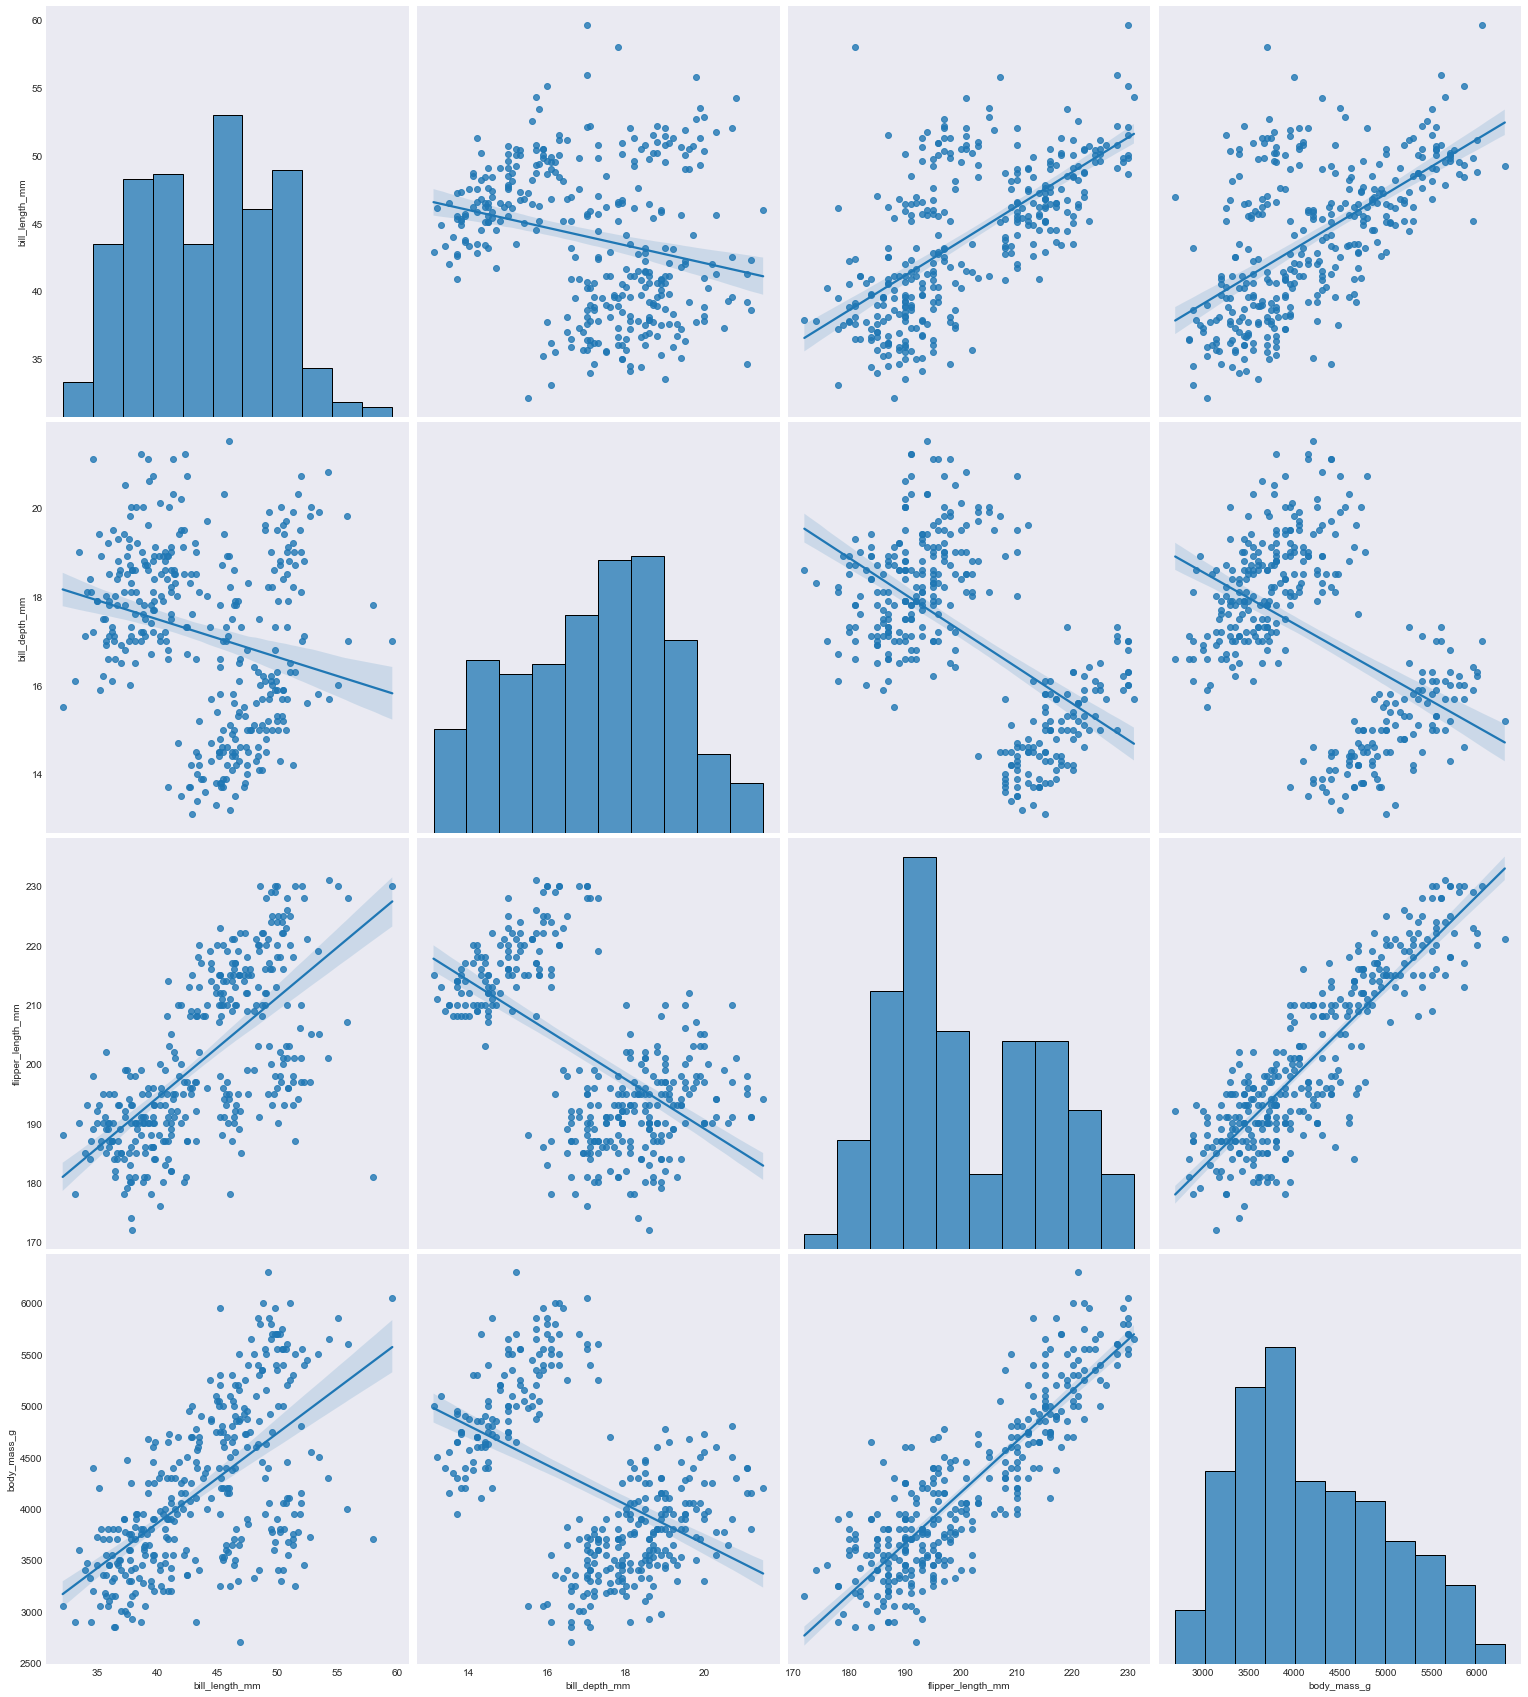

In [92]:
sns.pairplot(penguins, height=6, aspect=0.9, kind='reg')
plt.show()

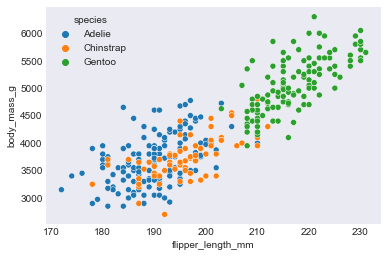

In [94]:
#Las variables flipper_length_mm y body_mass_g correlacionan muy bien, veamos en profundidad
# Analicemos en cuanto a especies
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

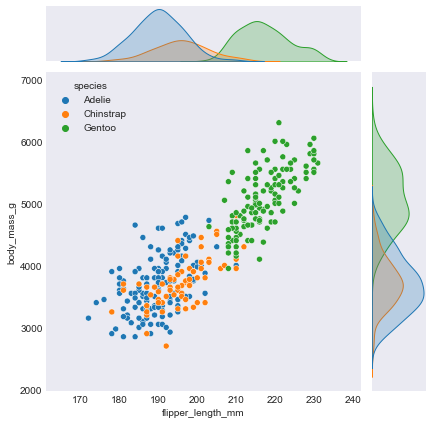

In [85]:
sns.jointplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

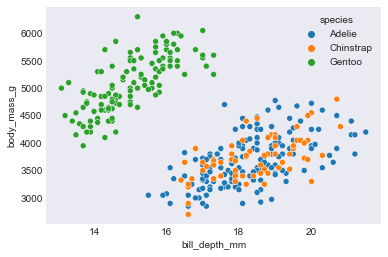

In [87]:
sns.scatterplot(data=penguins, x='bill_depth_mm', y='body_mass_g', hue='species')
plt.show()

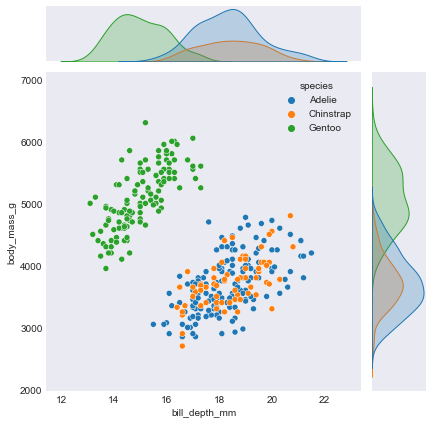

In [88]:
sns.jointplot(data=penguins, x='bill_depth_mm', y='body_mass_g', hue='species')
plt.show()

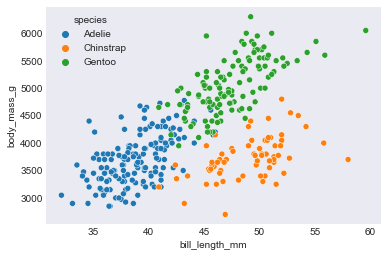

In [89]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue='species')
plt.show()

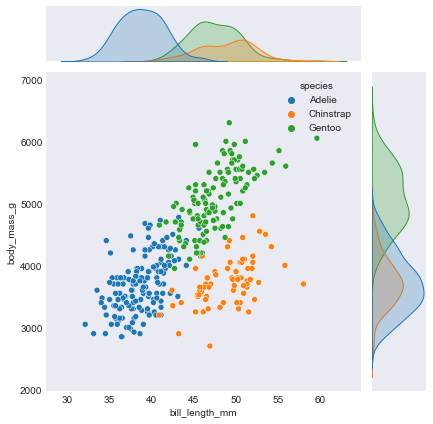

In [91]:
sns.jointplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue='species')
plt.show()